# Calculate for which EC the saturation of certain minerals will be reached

In [265]:
import phreeqpython
pp = phreeqpython.PhreeqPython()

import numpy as np

from matplotlib import pyplot as plt

# Phreeqc SOLUTION block

https://wwwbrr.cr.usgs.gov/projects/GWC_coupled/phreeqc/html/final-56.html#89789

concentration units --Default concentration units. Three groups of concentration units are allowed, concentration (1) per liter ("/L"), (2) per kilogram solution ("/kgs"), or (3) per kilogram water ("/kgw"). All concentration units for a solution must be within the same group. Within a group, either grams or moles may be used, and prefixes milli (m) and micro (u) are acceptable. Parts per thousand, "ppt"; parts per million, "ppm"; and parts per billion, "ppb", are acceptable in the "per kilogram solution" group. Default is mmol/kgw (millimoles per kilogram water).

In [266]:
# assume all alkalinity is OH-

kw=14

pH=14

TA=10**-(kw-pH)

print(TA)


# Simple, through a reaction block
solution0 = pp.add_solution_simple({'Ca(OH)2':TA*1000},temperature=15, units='mmol')

# Complex, allowing for more 'standard' PHREEQC input (Phreeqc example 3 -- Mixing)
solution = pp.add_solution({'units':'mmol/kgw',
                                 'pH': pH, # controlling the OH- and H+
                                 'temp': 25.0,
                                 'Ca': TA/2,
                                 #'Alkalinity': str(TA*1000)+' as HCO3',
                                })




solution3 = pp.add_solution({'units':'mmol/kgw',
                                 #'pH': 10, # controlling the OH- and H+
                                 'temp': 25.0,
                                 'Mg': 20.0,
                                 #'Ca': TA/2,
                                 'Alkalinity': str(2*20.0)+' as HCO3',
                                })


solution4 = pp.add_solution_simple({'Mg(HCO3)2':20},temperature=25, units='mmol')



1


In [267]:
solution4.pH

7.850013054278778

In [268]:
solution.phases


{'Fix_pH': -14.0,
 'H2(g)': -36.04892303367836,
 'H2O(g)': -1.5028233204748613,
 'O2(g)': -11.212491751948354}

# Equilibrium with high CO2 partial pressure

In [269]:
#equalize the solution it with high CO2 pressure 

#concentration CO2
p=415 # ppm

#partial pressure pCO2 in atm
pCO2=p*1e-6 

#phreeqc always uses log10 values
input_pCO2=np.log10(pCO2)



# equalize solution with CO2
# equilibrium with atmosphere
solution.equalize(['CO2(g)'], [input_pCO2])


input_pCO2=np.log10(pCO2)

solution3.equalize(['CO2(g)'], [input_pCO2])

solution4.equalize(['CO2(g)'], [input_pCO2])

In [270]:
print("Solution pH: {:.3}".format(solution3.pH))

Solution pH: 9.35


In [271]:
print("Solution pH: {:.3}".format(solution0.pH))

Solution pH: 14.2


In [272]:
print("Solution pH: {:.3}".format(solution4.pH))

Solution pH: 9.35


In [273]:
print(str(TA*1000)+' as HCO3')

1000 as HCO3


In [274]:
# Returns the specific conductance (in uS/cm) of the specified solution
print("Solution EC: {:3.2f} uS/cm".format(solution.sc))

print("Solution pH: {:.3}".format(solution.pH))

Solution EC: 38387.01 uS/cm
Solution pH: 10.3


# Raise the EC,pH stepwise to see when water  is reaching saturation state

Oceans are usually extrenmely oversaturated in CaCO3

https://chemistry-europe.onlinelibrary.wiley.com/doi/full/10.1002/chem.202202290

Any “inorganic precipitation” that does occur is generally of aragonite

Hence, although the surface waters are oversaturated with respect to calcite, this is a kinetically metastable situation; the world's oceans have been oversaturated with respect to calcite likely for the entirety of the presence of the ocean on Earth (>3 billion years). As a consequence, this metastable oversaturation has been biologically harnessed by a range of marine calcifiers that use biogenically precipitated calcium carbonate to form protective shells and exoskeletons.

In [346]:
#high partial pressure of CO2

#equalize the solution it with high CO2 pressure 

#concentration CO2 atmosphere
p=415 # ppm


#artificial atmosphere
p=15*1e3


#partial pressure pCO2 in atm
pCO2=p*1e-6 

#phreeqc always uses log10 values
input_pCO2=np.log10(pCO2)

In [347]:
temp=25

#add a pure water with 25 degC
solution_dunite=pp.add_solution({'temp':temp})


pH_s1=[]

EC_s1=[]

SI_calcite=[]

SI_aragonite=[]

SI_vaterite=[]

#precip_MgCO3=[]


for step in range(600):
    
    solution_dunite.add('Ca(OH)2',0.01, 'mmol') # add 1 mmol of 
    
    solution_dunite.equalize(['CO2(g)'], [input_pCO2])
    
    #precip_MgCO3.append(solution_dunite.species['MgCO3'])
    
    pH_s1.append(solution_dunite.pH)
    
    
    EC_s1.append(solution_dunite.sc)
    
    
    #safe Saturation index of some minerals different forms of CaCO3
    SI_calcite.append(solution_dunite.phases['Calcite'])
    
    SI_aragonite.append(solution_dunite.phases['Aragonite'])
    
    SI_vaterite.append(solution_dunite.phases['Vaterite'])
    
     
    

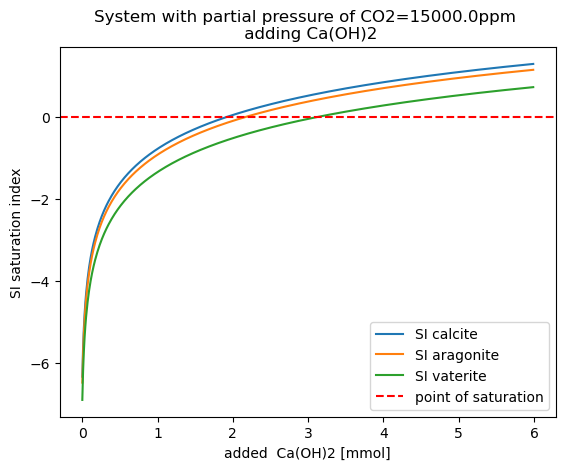

In [358]:
c=np.arange(0,600*0.01,0.01)

plt.plot(c,SI_calcite,label='SI calcite')
plt.plot(c,SI_aragonite, label='SI aragonite')
plt.plot(c,SI_vaterite, label='SI vaterite')
plt.axhline(y=0, color='r', linestyle='--',label='point of saturation')
plt.xlabel('added  Ca(OH)2 [mmol]')
plt.ylabel('SI saturation index')
plt.title('System with partial pressure of CO2={}ppm \n adding Ca(OH)2'.format(p))
plt.legend()


Text(0, 0.5, 'EC uS/cm')

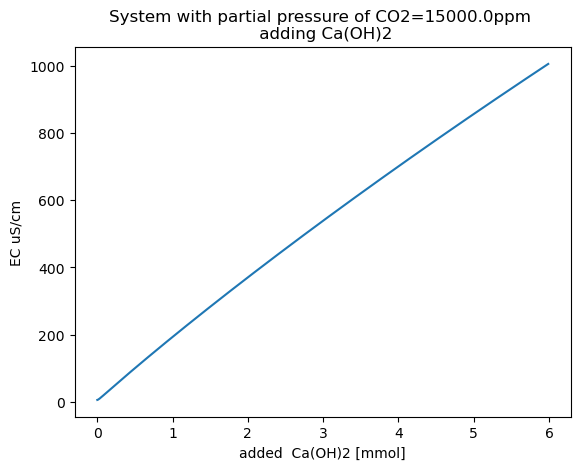

In [360]:
plt.plot(c,EC_s1)
plt.xlabel('added  Ca(OH)2 [mmol]')
plt.title('System with partial pressure of CO2={}ppm \n adding Ca(OH)2'.format(p))
plt.ylabel('EC uS/cm')

Text(0.5, 1.0, 'System with partial pressure of CO2=15000.0ppm \n adding Ca(OH)2')

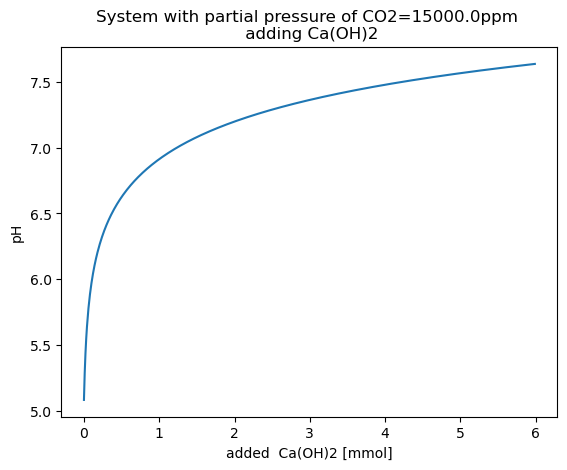

In [359]:
plt.plot(c,pH_s1)
plt.xlabel('added  Ca(OH)2 [mmol]')
plt.ylabel('pH')
plt.title('System with partial pressure of CO2={}ppm \n adding Ca(OH)2'.format(p))